In [1]:
from scipy import special
import numpy as np


def drumhead_height(n, k, distance, angle, t):
    kth_zero = special.jn_zeros(n, k)[-1]
    return np.cos(t) * np.cos(n * angle) * special.jn(n, distance * kth_zero)


theta = np.r_[0 : 2 * np.pi : 50j]
radius = np.r_[0:1:50j]

x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])

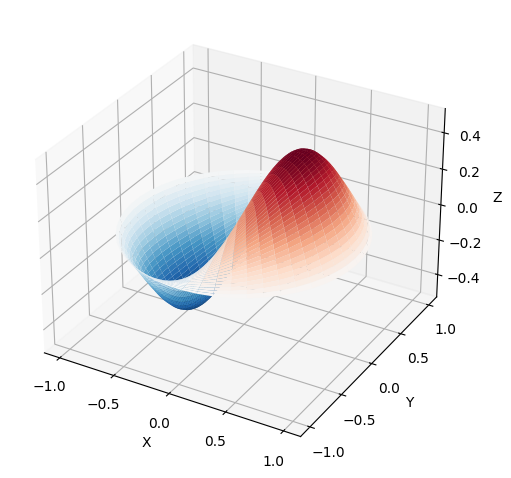

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes(rect=(0, 0.05, 0.95, 0.95), projection="3d")
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap="RdBu_r", vmin=-0.5, vmax=0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_xticks(np.arange(-1, 1.1, 0.5))
ax.set_yticks(np.arange(-1, 1.1, 0.5))
ax.set_zlabel("Z")
plt.show()

In [3]:
import scipy.integrate as integrate
import scipy.special as special

result = integrate.quad(lambda x: special.jv(2.5, x), 0, 4.5)
result

(1.1178179380783253, 7.866317250224184e-09)

In [4]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [5]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c


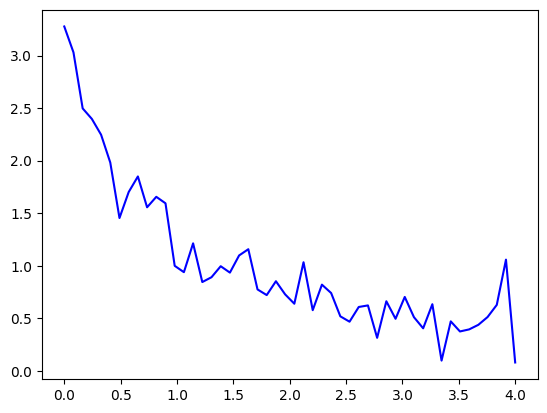

In [6]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, "b-", label="data")

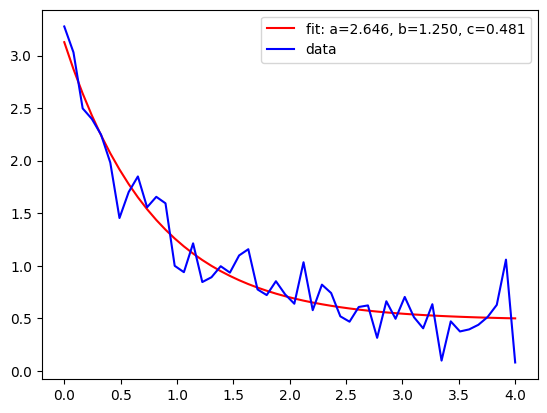

In [7]:
popt, pcov = curve_fit(func, xdata, ydata)
popt
plt.plot(
    xdata,
    func(xdata, *popt),
    "r-",
    label="fit: a=%5.3f, b=%5.3f, c=%5.3f" % tuple(popt),
)
plt.plot(xdata, ydata, "b-", label="data")
plt.legend()

In [8]:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3.0, 1.0, 0.5]))
popt

array([2.56993512, 1.        , 0.37915003])

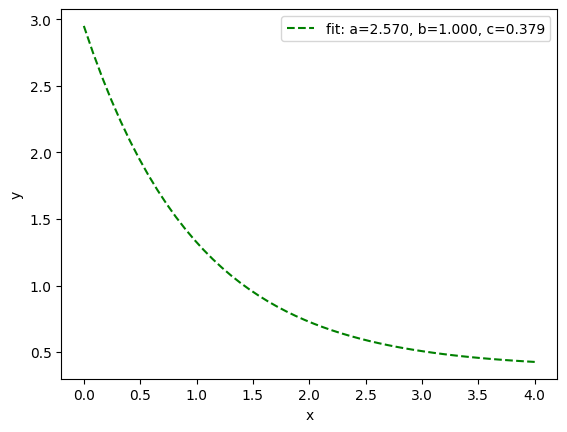

In [9]:
plt.plot(
    xdata,
    func(xdata, *popt),
    "g--",
    label="fit: a=%5.3f, b=%5.3f, c=%5.3f" % tuple(popt),
)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [10]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [11]:
# Creates a linear-spaced vector
x = np.linspace(0, 10, num=11, endpoint=True)

# Function to generate raw data
y = np.cos(-(x**2) / 9.0)

# 1D Interpolate linear
f = interp1d(x, y)

# 1D Interpolate Cubic
f2 = interp1d(x, y, kind="cubic")

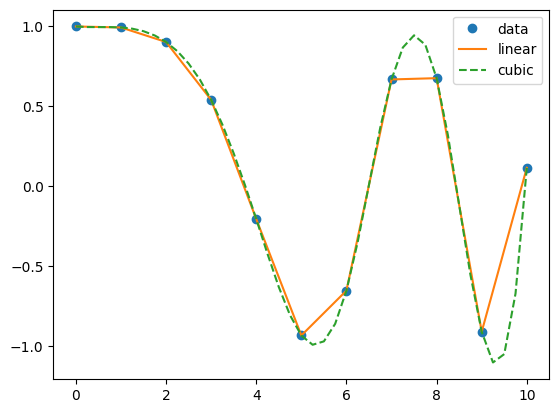

In [12]:
# Generates new higher-resolution x-data for interpolation
xnew = np.linspace(0, 10, num=41, endpoint=True)

# Makes the plots
plt.plot(x, y, "o", xnew, f(xnew), "-", xnew, f2(xnew), "--")
plt.legend(["data", "linear", "cubic"], loc="best")
plt.show()

In [13]:
from scipy.fft import fft, ifft

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
yinv = ifft(y)

print(y)

print(yinv)

[ 4.5       -0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]
[ 1. +0.j  2. +0.j  1. +0.j -1. +0.j  1.5+0.j]


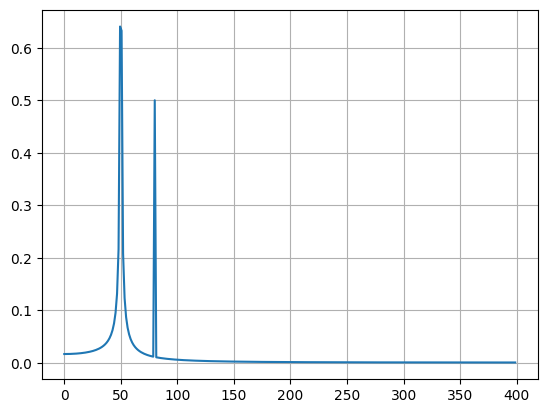

In [14]:
from scipy.fft import fft, fftfreq

# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N * T, N, endpoint=False)
y = np.sin(50.0 * 2.0 * np.pi * x) + 0.5 * np.sin(80.0 * 2.0 * np.pi * x)
yf = fft(y)
xf = fftfreq(N, T)[: N // 2]
import matplotlib.pyplot as plt

plt.plot(xf, 2.0 / N * np.abs(yf[0 : N // 2]))
plt.grid()
plt.show()

In [15]:
from scipy.fft import fftfreq

freq = fftfreq(8, 0.125)
freq

array([ 0.,  1.,  2.,  3., -4., -3., -2., -1.])

In [16]:
from scipy.fft import fftshift

x = np.arange(8)
print(fftshift(x))

freqs = np.fft.fftfreq(10, 0.1)
print(np.fft.fftshift(freqs))

[4 5 6 7 0 1 2 3]
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]


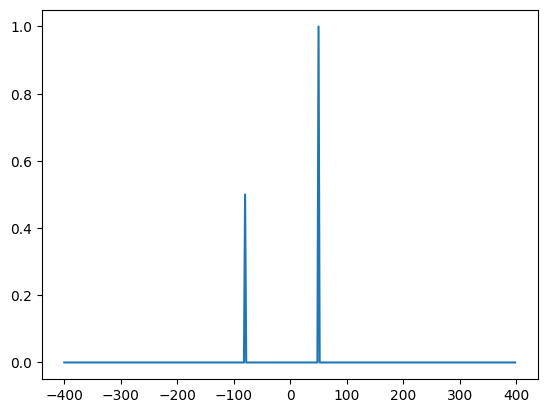

In [17]:
from scipy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt

# number of signal points
N = 400
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N * T, N, endpoint=False)
y = np.exp(50.0 * 1.0j * 2.0 * np.pi * x) + 0.5 * np.exp(-80.0 * 1.0j * 2.0 * np.pi * x)
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)

plt.plot(xf, 1.0 / N * np.abs(yplot))
plt.show()